# Rt semplice

Stima di Rt con... carta e penna.

> Max Pierini

***

In [1]:
import pickle
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set()

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv',
    parse_dates=['data'],
    index_col='data'
)
df.index = df.index.normalize()

In [3]:
a_sum = df[-7:].nuovi_positivi.sum()
a = a_sum / 7

In [4]:
b_sum = df[-14:-7].nuovi_positivi.sum()
b = b_sum / 7

# Carta e penna

Abbiamo urgente bisogno di stimare velocemente il numero di riproduzione di COVID-19 in Italia senza uso di computer e complesse simulazioni?

Bene. Armiamoci di carta, penna e una calcolatrice.

Da una fonte accertata (ad esempio [repository GitHub del Diparimento Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv)) otteniamo i valori dei nuovi positivi giornalieri delle ultime due settimane.

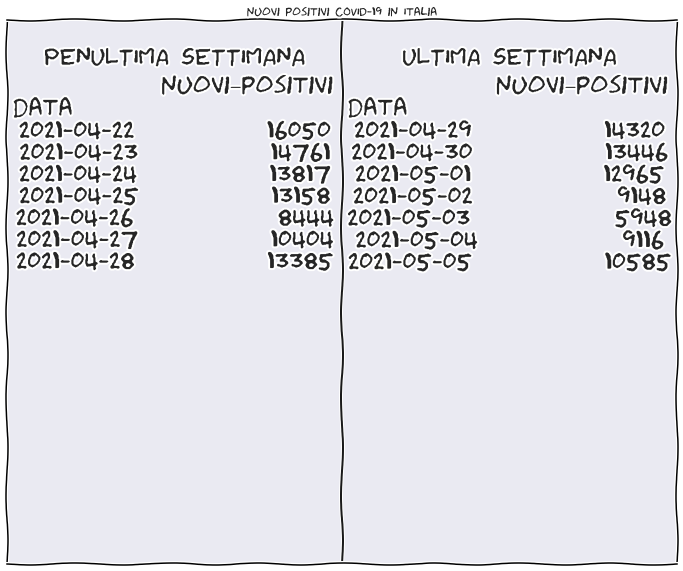

In [5]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.text(
        .25, .95, 'PENULTIMA SETTIMANA',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.text(
        .25, .9, df[-14:-7][['nuovi_positivi']].to_string(), 
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.text(
        .75, .95, 'ULTIMA SETTIMANA',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.text(
        .75, .9, df[-7:][['nuovi_positivi']].to_string(), 
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.set(
        xticks=[],
        yticks=[],
        title='nuovi positivi COVID-19 in Italia',
        xlim=(-1, 1)
    )
    ax.axvline(0, color='k')
    plt.show()

Calcoliamo le medie di ultima e penultima settimana, che chiameremo rispettivamente $\alpha$ e $\beta$.

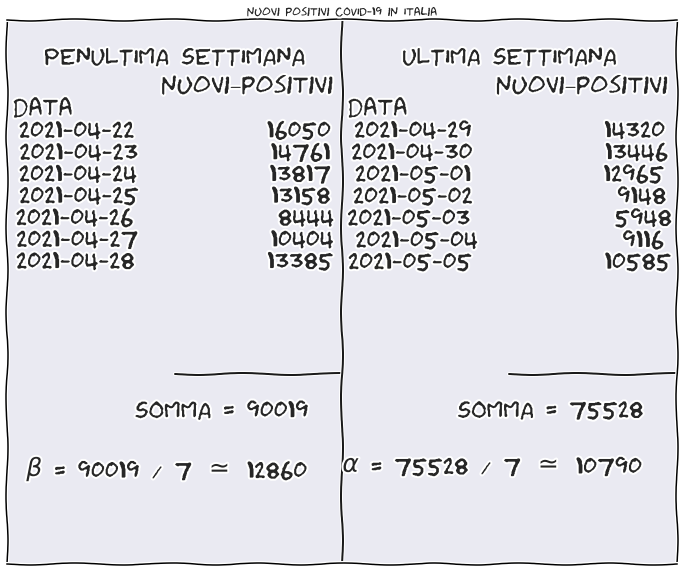

In [6]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 10))

    ax.text(
        .25, .95, 'PENULTIMA SETTIMANA',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.text(
        .25, .9, df[-14:-7][['nuovi_positivi']].to_string(), 
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.plot([-.5, 0], [.35, .35], color='k')
    ax.text(
        .45, .3, f"SOMMA = {b_sum}", 
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=25
    )
    ax.text(
        .45, .2, fr"$\beta$ = {b_sum} / 7 $\simeq$ {b:.0f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=25
    )
    
    ax.text(
        .75, .95, 'ULTIMA SETTIMANA',
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.text(
        .75, .9, df[-7:][['nuovi_positivi']].to_string(), 
        transform=ax.transAxes,
        ha='center', va='top',
        fontsize=25
    )
    ax.plot([.5, 1], [.35, .35], color='k')
    ax.text(
        .95, .3, f"SOMMA = {a_sum}", 
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=25
    )
    ax.text(
        .95, .2, fr"$\alpha$ = {a_sum} / 7 $\simeq$ {a:.0f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=25
    )

    ax.set(
        xticks=[],
        yticks=[],
        title='nuovi positivi COVID-19 in Italia',
        xlim=(-1, 1), ylim=(0, 1),
    )
    
    ax.axvline(0, color='k')
    plt.show()

Stimiamo il valore medio del numero di riproduzione $R[t]_\mu$ come rapporto tra $\alpha$ e $\beta$

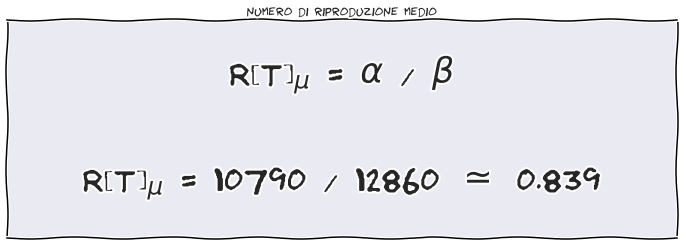

In [7]:
R_mu = a / b
Markdown(fr"$R[t]_{{\mu}} = \frac{{{a:.0f}}}{{{b:.0f}}} \simeq {R_mu:.3f}$")

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.text(
        .5, .75, fr"R[t]$_\mu$ = $\alpha$ / $\beta$",
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=35
    )
    ax.text(
        .5, .25, fr"R[t]$_\mu$ = {a:.0f} / {b:.0f} $\simeq$ {R_mu:.3f}",
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=35
    )
    ax.set(
        xticks=[],
        yticks=[],
        title='numero di riproduzione medio'
    )
    plt.show()

E stimiamo un'approssimazione dell'intervallo di credibilità al 95% come

In [8]:
R_sigma = np.sqrt(a) / b

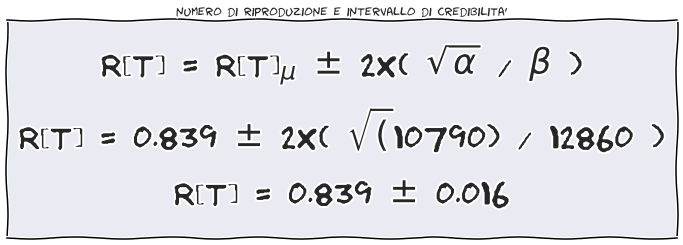

In [9]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.text(
        .5, .8, r"R[t] = R[t]$_\mu$ $\pm$ 2x( $\sqrt{\alpha}$ / $\beta$ )",
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=35
    )
    ax.text(
        .5, .5, fr"R[t] = {R_mu:.3f} $\pm$ 2x( $\sqrt{{(}}${a:.0f}) / {b:.0f} )",
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=35
    )
    ax.text(
        .5, .2, fr"R[t] = {R_mu:.3f} $\pm$ {2*R_sigma:.3f}",
        transform=ax.transAxes,
        ha='center', va='center',
        fontsize=35
    )

    ax.set(
        xticks=[],
        yticks=[],
        title="numero di riproduzione e intervallo di credibilita'"
    )
    plt.show()

In [10]:
Markdown(fr"""
Per cui il valore medio di $R[t]$ è
{R_mu:.3f} mentre il
minimo dell'intervallo di credibilità al 95% è
{R_mu - 2 * R_sigma:.3f}
e il valore massimo
{R_mu + 2 * R_sigma:.3f}.
""")


Per cui il valore medio di $R[t]$ è
0.839 mentre il
minimo dell'intervallo di credibilità al 95% è
0.823
e il valore massimo
0.855.


Possiamo disegnare sul foglio la media, l'intervallo di credibilità e il valore di riferimento 1

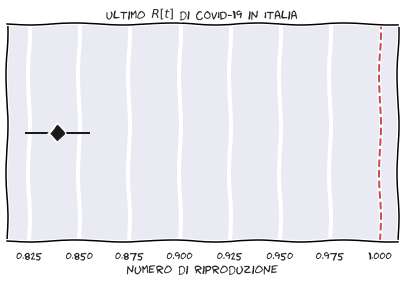

In [11]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.errorbar(R_mu, 0, xerr=2*R_sigma, marker='D', markersize=10, color='k')
    ax.axvline(1, color='r', ls='--')
    ax.set(
        yticks=[],
        xlabel='numero di riproduzione',
        title='Ultimo $R[t]$ di COVID-19 in Italia'
    )
    ax.grid(color='w')
    plt.show()

# Regioni

Allo stesso modo possiamo stimare $R[t]$ e l'intervallo di credibilità al 95% delle singole regioni italiane.

In [12]:
rg = pd.read_csv(
    'https://github.com/pcm-dpc/COVID-19/raw/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
)
rg['data'] = rg.data.dt.normalize()

In [13]:
R_regioni = {
    'regione': [],
    'Rt': [],
    'CI': [],
}

for region in rg.denominazione_regione.unique():
    _df = rg[rg.denominazione_regione==region]
    _a_sum = _df[-7:].nuovi_positivi.sum()
    _a = _a_sum / 7
    _b_sum = _df[-14:-7].nuovi_positivi.sum()
    _b = _b_sum / 7
    _R = _a / _b
    _C = 2 * np.sqrt(_a) / _b
    R_regioni['regione'].append(region)
    R_regioni['Rt'].append(_R)
    R_regioni['CI'].append(_C)
Rdf = pd.DataFrame(R_regioni)

In [14]:
Rdf

,regione,Rt,CI
0,Abruzzo,0.983992,0.161069
1,Basilicata,0.854127,0.151498
2,Calabria,0.739061,0.081298
3,Campania,0.871887,0.044144
4,Emilia-Romagna,0.900937,0.062782
5,Friuli Venezia Giulia,0.826786,0.143769
6,Lazio,0.832747,0.054109
7,Liguria,0.787302,0.107999
8,Lombardia,0.834350,0.041180
9,Marche,0.857455,0.114509


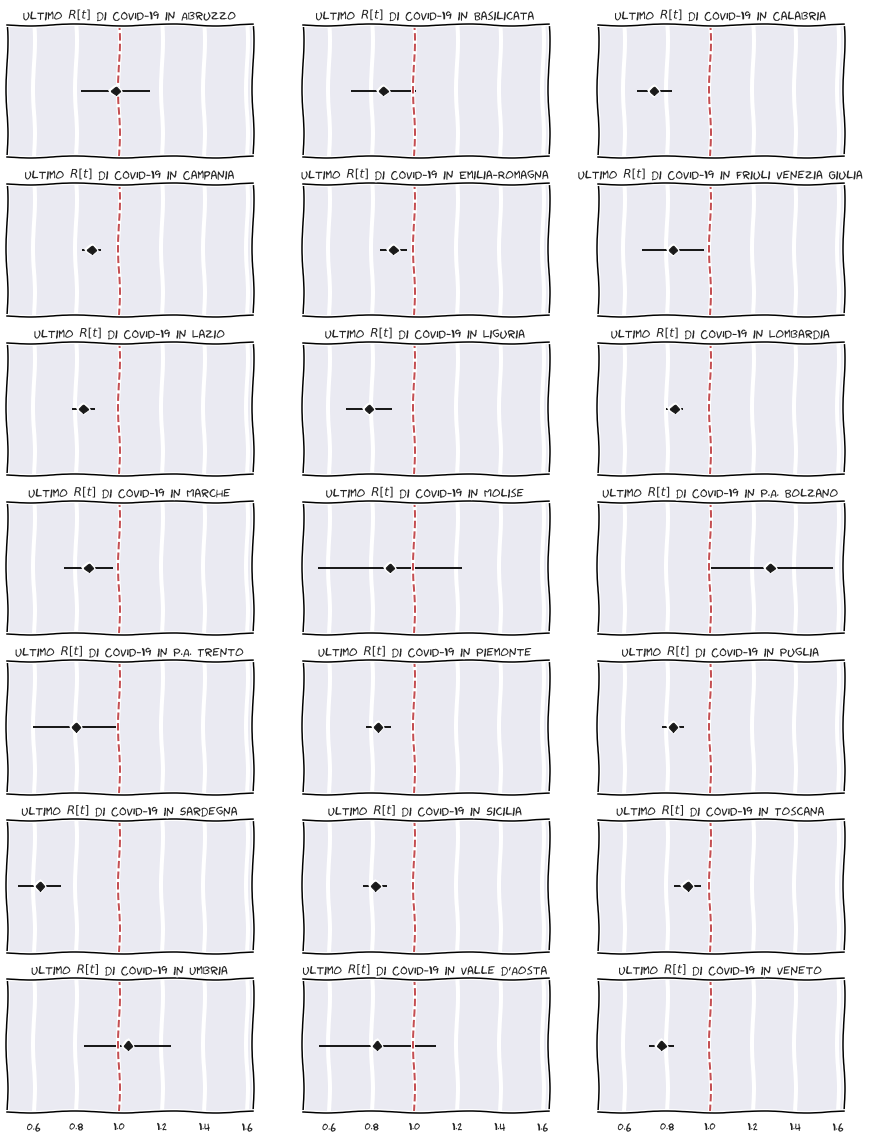

In [15]:
with plt.xkcd():
    fig, axs = plt.subplots(7, 3, figsize=(15, 20), sharex=True)
    for i, region in enumerate(Rdf.regione):
        _Rdf = Rdf[Rdf.regione==region]
        ax = axs.flat[i]
        ax.errorbar(_Rdf.Rt, 0, xerr=_Rdf.CI, marker='D', markersize=6, color='k')
        ax.axvline(1, color='r', ls='--')
        ax.set(
            yticks=[],
            #xlabel='numero di riproduzione',
            title=f'Ultimo $R[t]$ di COVID-19 in {region}'
        )
        ax.grid(color='w')
    plt.show()

# Metodo

Tra le molte funzioni di _distribuzione di probabilità_, la distribuzione **Gamma** (vedi [WikiPedia](https://it.wikipedia.org/wiki/Distribuzione_Gamma)) in particolare è definita come

$$
f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}
$$

dove $\Gamma$ è la funzione Gamma

$$
\Gamma(\alpha) = \int_{0}^{\infty} t^{\alpha - 1} e^{-t} dt
$$

e per numeri naturali è riducibile a

$$
\Gamma(\alpha) = (\alpha - 1)!
$$

Complessità matematica a parte, che non è scopo di questa trattazione, la distribuzione di probabilità **Gamma** è parametrizzata sui parametri $\alpha$ e $\beta$, che sono chiamati anche $shape$ e $rate$

$$
f(x; \alpha, \beta) = \mathbf{Gamma}(\alpha, \beta)
$$

ed ha due proprietà interessanti che useremo per la stima di $R[t]$

1. la media $\mu$ è pari al rapporto tra $\alpha$ e $\beta$ (ovvero tra $shape$ e $rate$)

$$
\mu = \frac{\alpha}{\beta}
$$

2. la deviazione standard $\sigma$ è pari al rapporto tra $\sqrt{\alpha}$ e $\beta$

$$
\sigma = \frac{\sqrt{\alpha}}{\beta}
$$

Il numero di riproduzione effettivo $R[t]$ può essere molto semplicemente definito come il rapporto tra i nuovi positivi $k_{t}$ osservati al tempo $t$ e i nuovi positivi $k_{t-1}$ osservati al tempo precedente $t-1$ (vedi [Wallinga-Teunis 2004](https://doi.org/10.1093/aje/kwh255) e [Wallinga-Lipsitch 2007](https://doi.org/10.1098/rspb.2006.3754))

$$
R[t] = \frac{k_{t}}{k_{t-1}}
$$

Dunque

- se $k_t = k_{t-1}$ ovvero se i positivi osservati in $t$ e in $t-1$ sono uguali, il loro rapporto è 1 ed $R[t]$ è 1: **l'epidemia è in una fase incerta**

- se $k_t > k_{t-1}$ ovvero se i positivi osservati in $t$ sono maggiori che in $t-1$, il loro rapporto è maggiore di 1 ed $R[t]$ è maggiore di 1: **l'epidemia è in fase di crescita esponenziale**

- se $k_t < k_{t-1}$ ovvero se i positivi osservati in $t$ sono minori che in $t-1$, il loro rapporto è minore di 1 ed $R[t]$ è minore di 1: **l'epidemia è in fase di risoluzione**

Vediamo degli esempi

1. $k_t = 300$ e $k_{t-1}=100$, ne ricaviamo $R[t] = 300 / 100 = 3$

2. $k_t = 100$ e $k_{t-1}=100$, ne ricaviamo $R[t] = 100 / 100 = 1$

3. $k_t = 50$ e $k_{t-1}=100$, ne ricaviamo $R[t] = 50 / 100 = 0.5$

Chiediamoci però, con quale livello di credibilità possiamo affermare che $R[t]$ è 3 nel primo esempio, 1 nel secondo esempio e 0.5 nel terzo?

Ovvero, quanto siamo sicuri dei valori stimati?

Per questo, possiamo usare le proprietà della distribuzione **Gamma** (vedi [Cori et al. 2013](https://academic.oup.com/aje/article/178/9/1505/89262)).

Osserviamo per esempio cosa accade nei seguenti tre esempi

1. $k_t = 1500$ e $k_{t-1}=1000$
2. $k_t = 150$ e $k_{t-1}=100$
3. $k_t = 15$ e $k_{t-1}=10$

È evidente che in tutti i tre casi $R[t]=1.5$ ma, sapendo che nella funzione **Gamma** la media $\mu=\alpha/\beta$, possiamo utilizzarla ponendo $\alpha=k_t$ e $\beta=k_{t-1}$

$$
R_t = \mathbf{Gamma}(\alpha = k_t, \beta = k_{t-1})
$$

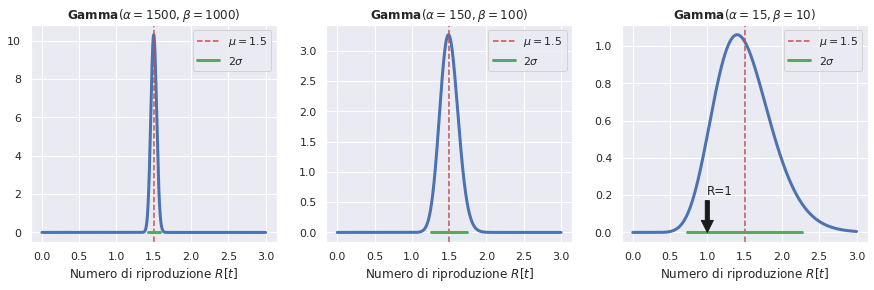

In [16]:
kt1_a = 1500; kt1_b = 1000
kt2_a = 150; kt2_b = 100
kt3_a = 15; kt3_b = 10

dist1 = sps.gamma(a=kt1_a, scale=1 / kt1_b)
dist2 = sps.gamma(a=kt2_a, scale=1 / kt2_b)
dist3 = sps.gamma(a=kt3_a, scale=1 / kt3_b)

dist_x = np.linspace(0, 3, 1000)

dist1_y = dist1.pdf(dist_x)
dist2_y = dist2.pdf(dist_x)
dist3_y = dist3.pdf(dist_x)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(dist_x, dist1_y, lw=3)
ax[1].plot(dist_x, dist2_y, lw=3)
ax[2].plot(dist_x, dist3_y, lw=3)

ax[0].axvline(kt1_a / kt1_b, color='r', ls='--', label=f"$\mu = {kt1_a / kt1_b}$")
ax[1].axvline(kt2_a / kt2_b, color='r', ls='--', label=f"$\mu = {kt2_a / kt2_b}$")
ax[2].axvline(kt3_a / kt3_b, color='r', ls='--', label=f"$\mu = {kt3_a / kt3_b}$")

ax[0].plot(
    [
        kt1_a / kt1_b - 2 * np.sqrt(kt1_a) / kt1_b,
        kt1_a / kt1_b + 2 * np.sqrt(kt1_a) / kt1_b
    ], [0, 0],
    color='g', lw=3, label=f"$2\sigma$")
ax[1].plot(
    [
        kt2_a / kt2_b - 2 * np.sqrt(kt2_a) / kt2_b,
        kt2_a / kt2_b + 2 * np.sqrt(kt2_a) / kt2_b
    ], [0, 0],
    color='g', lw=3, label=f"$2\sigma$")
ax[2].plot(
    [
        kt3_a / kt3_b - 2 * np.sqrt(kt3_a) / kt3_b,
        kt3_a / kt3_b + 2 * np.sqrt(kt3_a) / kt3_b
    ], [0, 0],
    color='g', lw=3, label=f"$2\sigma$")

ax[0].set(
    title=fr"$\mathbf{{Gamma}}(\alpha={kt1_a}, \beta={kt1_b})$"
)
ax[1].set(
    title=fr"$\mathbf{{Gamma}}(\alpha={kt2_a}, \beta={kt2_b})$"
)
ax[2].set(
    title=fr"$\mathbf{{Gamma}}(\alpha={kt3_a}, \beta={kt3_b})$"
)

ax[2].annotate(
    'R=1', xy=(1,0), xytext=(1, .2), 
    arrowprops=dict(color='k')
)
ax[0].legend()
ax[1].legend()
ax[2].legend()

for i in ax:
    i.set_xlabel('Numero di riproduzione $R[t]$')

plt.show()

Come vediamo, la media $\mu$ corrisponde infatti a 1.5 in tutti i tre casi, ma molto diversa è la distribuzione di probabilità: minori sono $\alpha$ e $\beta$ maggiore è la deviazione standard.

Infatti sappiamo che per la distribuzione **Gamma**

$$
\sigma = \frac{\sqrt{\alpha}}{\beta}
$$

In particolare notiamo che per $\alpha=15$ e $\beta=10$, la distribuzione di probabilità _comprende 1_ che è il valore di riferimento per determinare se l'epidemia sia in fase di crescita o di decadimento: in questo caso dunque, l'intervallo di credibilità _non esclude 1_ ovvero non siamo "sufficientemente certi" che il valore reale di $R[t]$ sia maggiore di 1.

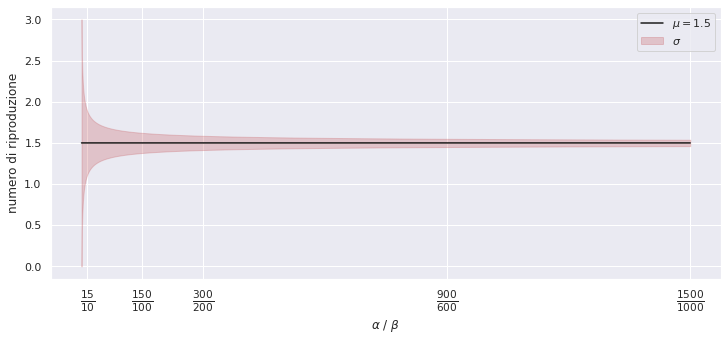

In [17]:
alpha = np.linspace(0, 1500, 1501)[1:]
beta = np.linspace(0, 1000, 1501)[1:]

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(alpha, alpha / beta, color='k', label=f"$\mu=1.5$")
ax.fill_between(
    alpha,
    alpha / beta + np.sqrt(alpha) / beta,
    alpha / beta - np.sqrt(alpha) / beta,
    color='C3', ec='C3', alpha=.25,
    label="$\sigma$"
)
xticks = [15, 150, 300, 900, 1500]
ax.set(
    xticks=xticks,
    xlabel=r"$\alpha$ / $\beta$",
    ylabel='numero di riproduzione'
)
ax.set_xticklabels(
    [fr"$\frac{{{a:.0f}}}{{{a/1.5:.0f}}}$" for a in xticks],
    fontsize=15
)
ax.legend()
plt.show()

Come vediamo, al diminuire di $\alpha$ e $\beta$ la deviazione standard $\sigma$ aumenta ovvero aumenta il "livello di incertezza" del risultato medio.

Per approssimare l'intervallo di credibilità* al 95%, complesso da calcolare a mano, possiamo definire come limiti

$$
R_{t,\mathrm{lo}} = \mu - 2 \sigma
$$

$$
R_{t,\mathrm{hi}} = \mu + 2 \sigma
$$

*: si parla di intervallo di credibilità e non di intervallo di confidenza perché la stima di $R[t]$ si basa su metodo bayesiano e non frequentista; il significato dal punto di vista pratico è simile

Ma come definiamo i tempi $t$ e $t-1$?

L'intervallo tra un contagio e il contagio secondario da esso indotto si chiama **intervallo seriale** (o _intervallo di generazione_) ed è stimato con complessi metodi a partire dall'osservazione dei contagi e dei loro contatti.

Il problema è che l'intervallo seriale non è fisso ma è anch'esso una distribuzione di probabilità (solitamente Gamma o Weibull) con media stimata di circa 7 giorni per COVID-19 (vedi [Cereda-Tirani 2020](https://arxiv.org/abs/2003.09320v1)).

In [18]:
ISS_sh = 1.87
ISS_ra = 0.28

def gamma_mu_sd_from_shape_rate(shape, rate):
    mu = shape / rate
    sd = np.sqrt(shape) / rate
    return mu, sd

def generation_time_gamma(sh, ra, plot=True, title='Estimated', size=None):

    dist = sps.gamma(a=sh, scale=1/ra)

    if size == None:
        max_x = int(np.ceil(dist.ppf(.9999)))
    else:
        max_x = size
    x = np.linspace(0, max_x, max_x+1)
    y = dist.pdf(x)
    y /= y.sum()
    
    mu, sd = gamma_mu_sd_from_shape_rate(sh, ra)
    
    if plot:
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.bar(x, y, alpha=.5)
        ax.plot(x, y)
        ax.axvline(mu, color='r', ls='--', lw=3, label=f'media {mu:.1f} giorni')
        ax.legend()
        ax.set(
            title=f'COVID-19 Intervallo Seriale '
                  f'stimato da Cereda-Tirani 2020',
            xlabel='giorni tra contagio primario e secondario',
            ylabel='densità di probabilità'
        )
        plt.show()

    return x, y, mu, sd

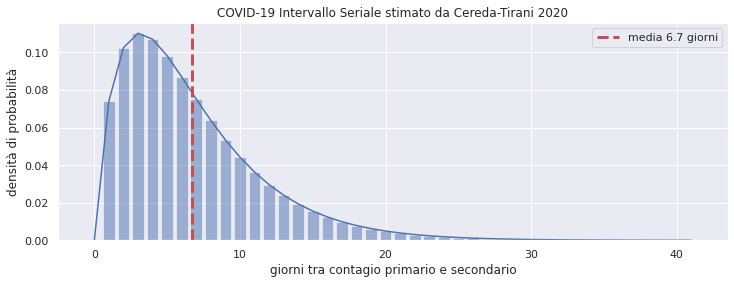

In [19]:
_ = generation_time_gamma(ISS_sh, ISS_ra)

Per semplificare dunque la stima di $R[t]$ per COVID-19 con i dati reali italiani, possiamo confrontare i dati medi settimanali (7 giorni, pari circa alla media dell'intervallo seriale).


Pertanto, in riferimento al giorno $t$, la media dell'ultima settimana risulterà

$$
k_{t} = \frac{\sum_{i=0}^{6}k_{t-i}}{7}
$$

e la media della penultima settimana

$$
k_{t-1} = \frac{\sum_{i=7}^{13}k_{t-i}}{7}
$$

che corrispondono ai parametri $\alpha$ e $\beta$ della distribuzione **Gamma**

$$
R[t] = \mathbf{Gamma}\left( 
\alpha=\frac{\sum_{i=0}^{6}k_{t-i}}{7} \;,\;
\beta=\frac{\sum_{i=7}^{13}k_{t-i}}{7}
\right)
$$

Procedendo così a ritroso nel tempo, possiamo stimare $R[t]$ dell'intera serie temporale (nella prossima tabella e nel grafico, è stimato utilizzando le medie di settimane complete, da lunedì a domenica). Escludiamo la prima settimana perché non abbiamo una settimana precedente da confrontare e l'ultima settimana se incompleta.

In [20]:
W = df[['nuovi_positivi']].resample('W', label='left').sum() / 7
W['precedente'] = np.concatenate(([np.nan], W[:-1].values.ravel()))

In [21]:
W.columns = ['alpha', 'beta']

In [22]:
W['Rt mean'] = (W.alpha) / W.beta

In [23]:
W['Rt SD'] = np.sqrt(W.alpha) / W.beta

In [24]:
W['Rt lo'] = W['Rt mean'] - W['Rt SD'] * 2
W['Rt hi'] = W['Rt mean'] + W['Rt SD'] * 2

In [25]:
W

,alpha,beta,Rt mean,Rt SD,Rt lo,Rt hi
data,,,,,,
2020-02-23,240.857143,NaN,NaN,NaN,NaN,NaN
2020-03-01,811.571429,240.857143,3.369514,0.118278,3.132958,3.606070
2020-03-08,2481.714286,811.571429,3.057912,0.061383,2.935146,3.180679
2020-03-15,4913.000000,2481.714286,1.979680,0.028244,1.923193,2.036167
2020-03-22,5507.285714,4913.000000,1.120962,0.015105,1.090752,1.151172
...,...,...,...,...,...,...
2021-04-04,14518.142857,19473.142857,0.745547,0.006188,0.733172,0.757922
2021-04-11,14340.714286,14518.142857,0.987779,0.008248,0.971282,1.004276
2021-04-18,13224.000000,14340.714286,0.922130,0.008019,0.906092,0.938167


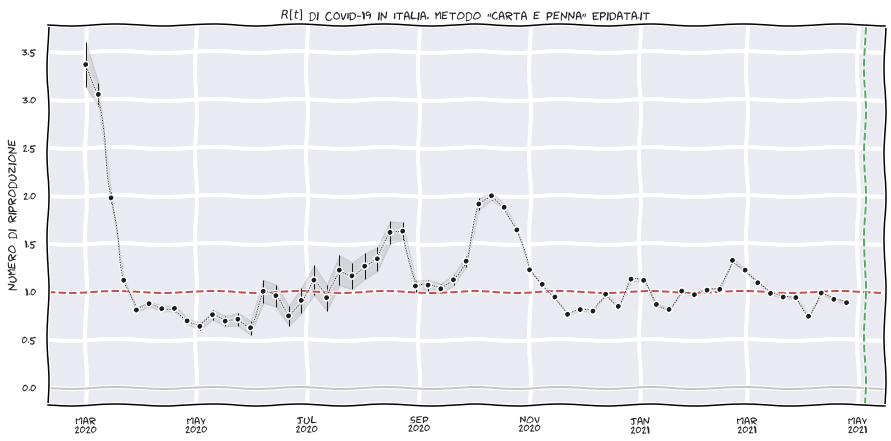

In [26]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.errorbar(
        W.index[:-1],
        W['Rt mean'][:-1], 
        yerr=2*W['Rt SD'][:-1],
        color='k', marker='.',
        ls=':', lw=1
    )
    ax.fill_between(
        W.index[:-1],
        W['Rt lo'][:-1], W['Rt hi'][:-1],
        color='k', alpha=.1
    )
    ax.axhline(1, color='r', ls='--')
    ax.axhline(0, color='k', alpha=.25)
    ax.axvline(df.index[-1], ls='--', color='C2')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.grid(color='w')

    ax.set(
        title='$R[t]$ di COVID-19 in Italia, metodo "carta e penna" EpiData.it',
        ylabel="numero di riproduzione"
    )
    
    plt.show()

In [27]:
with open('Rt_estimates.pkl', 'rb') as f:
    methods = pickle.load(f)

In [28]:
def plot_compare_Rt(methods, carta_penna, zone='ITALIA', Rt=None, xlim=None):
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 12))
    gs = GridSpec(3, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    
    ax = [ax1, ax2, ax3, ax4, ax5, ax6]

    for i, method in enumerate(methods):
        
        _df = methods[method]
        
        if _df is not None:
            _df.plot(y='R', ax=ax[i], label='Rt', color=f'C{i}', lw=2)
            ax[i].fill_between(
                _df.index,
                _df.lo, _df.hi,
                alpha=.2, color=f'C{i}',
            )
            ax[i].plot(
                carta_penna['Rt mean'], 
                color='k', marker='.', ls='--', lw=2,
                label='carta e penna',
                alpha=.5,
            )
            ax[i].fill_between(
                carta_penna.index,
                carta_penna['Rt lo'], carta_penna['Rt hi'],
                alpha=.1, color='k',
            )
                
            ax[i].set_title(f'Metodo {method}', fontsize=15)
            ax[i].legend()
            ax[i].axhline(1, color='k', ls='--', lw=1)
            ax[i].tick_params(axis='y', which='both', labelleft='on', labelright='on')
            ylim = ax[i].get_ylim()
            ax[i].set(
                xlim=xlim,
                ylim=(0, 4),
            )
        if Rt is not None:
            ax[i].plot(Rt, color='k', label='Real Rt')
            ax[i].legend()

    #Rt_BR.plot(y='R', ax=ax[-1], lw=2, ls=':',  label='Bettencourt-Ribeiro-Systrom')
    #Rt_RK.plot(y='R', ax=ax[-1], lw=2, ls='-.', label='Robert Koch Institute')
    #Rt_WT.plot(y='R', ax=ax[-1], lw=2, ls='-',  label='Wallinga-Teunis')
    #Rt_EE.plot(y='R', ax=ax[-1], lw=2, ls='--', label='EpiEstim Cori et al.')
    #ax[-1].set(
    #    xlim=xlim,
    #    ylim=(0, 4),
    #)
    #ax[-1].axhline(1, color='k', ls='--')
    #ax[-1].tick_params(axis='y', which='both', labelleft='on', labelright='on')
            
    fig.suptitle(f'Confronto tra principali metodi di stima $R_t$ e il metodo "carta e penna" di EpiData.it', fontsize=20)
    #fig.tight_layout()
    #fig.set_facecolor('#00000000')
    #fig.savefig('comparazione-metodi.png', dpi=300)
    plt.show()

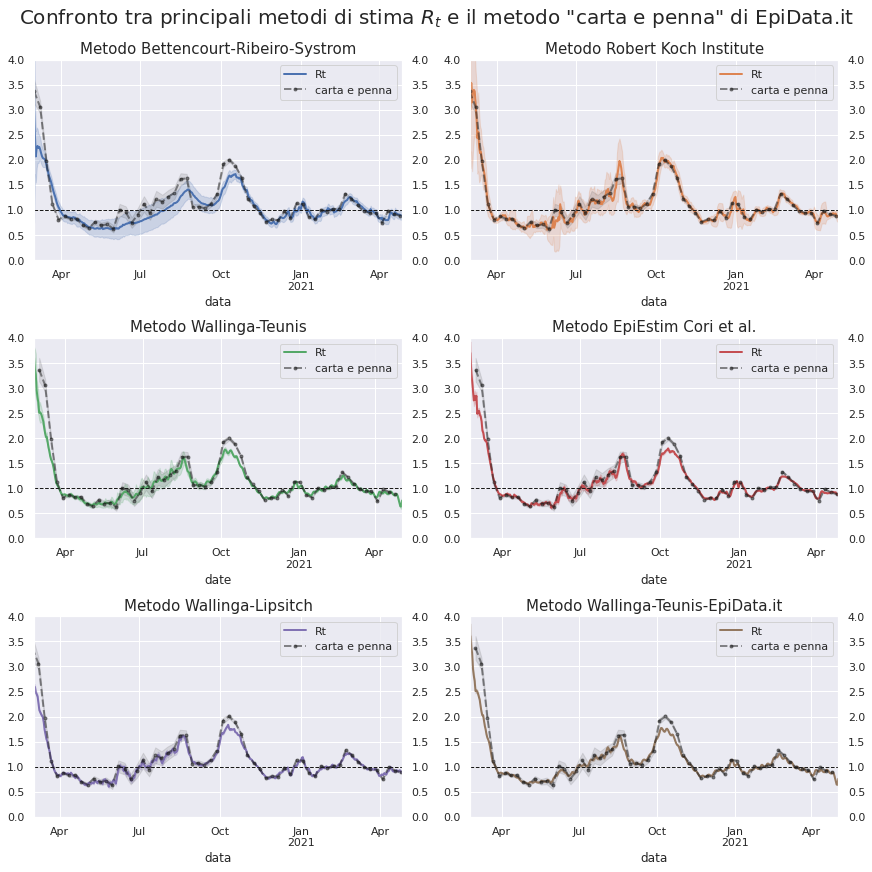

In [29]:
plot_compare_Rt(methods, W[1:-1], zone='ITALIA', Rt=None, xlim=None)

Notiamo una sovrastima di $R[t]$ con il metodo "carta e penna" per valori superiori a 1.5 ma possiamo considerarla accettabile data la facilità e la velocità di calcolo.

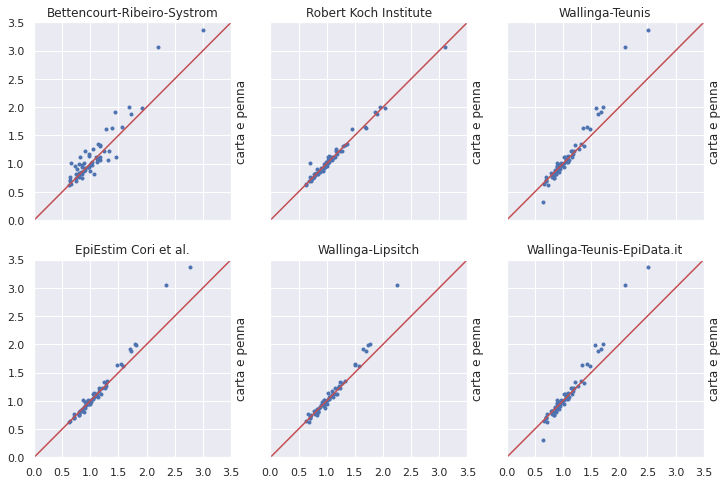

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

for i, method in enumerate(methods):
    _df = W.merge(
        methods[method],
        left_index=True, right_index=True
    )
    ax.flat[i].plot(
        _df['R'], _df['Rt mean'], 
        marker='.', ls='none'
    )
    ax.flat[i].set(
        xlim=(0, 3.5),
        ylim=(0, 3.5),
        xticks=ax.flat[i].get_yticks(),
        title=method,
        ylabel='carta e penna'
    )
    ax.flat[i].axline(xy1=[0,0], slope=1, color='r')
    ax.flat[i].yaxis.set_label_position("right")
plt.show()